# Time Series Analysis

In [1]:
#Importing
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


## 1. Data Collection:

## Packages:

In [4]:
print('Time Series Basics')

Time Series Basics


In [5]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

In [6]:
data.shape

(144, 1)

In [7]:
data.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


## 2. Data Preprocessing:

#### Check Missing

In [10]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
missing_values = data.isnull().sum()
print(missing_values)

Passengers    0
dtype: int64


In [12]:
#check index is datetime type
print(data.index.dtype)

datetime64[ns]


## 3. Time Series Decomposition:

Decompose the time series into its component parts.

Apply time series decomposition to separate the data into trend, seasonal, and residual components.

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


Visuals:
- Observed: displays data
- Trend: smooth curve, indicating overal growth/decline
- Seasonal: repeating pattern with consistent peaks and troughs
- Residual: remaining part of the data after the trend and seasonal components are removed.

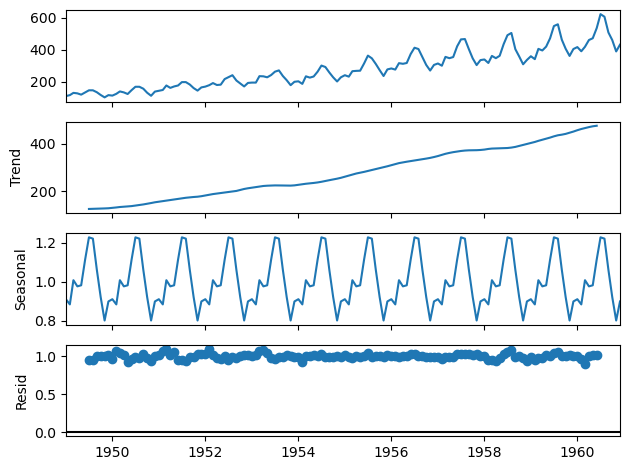

In [20]:
decomposition = seasonal_decompose(data, model='multiplicative')

#visualize decomposition:
decomposition.plot()
plt.show()

## 4. Modeling:

Fit the time series model to the data

In [32]:
#split test and train
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [34]:
#train test split
df = pd.DataFrame(data)
df['Month'] = df.index

train_size = int(len(df) * 0.8)
train,test = train_test_split(df, train_size=train_size, shuffle = False)
train_series = train['Passengers']
test_series = test['Passengers']

### Moving Averages Model

- a moving average smoothens the time series by averaging the data points within a sliding window

- window parameter determines the number of data points to include in each average (monthly 12 is suitable)

  
- Purpose: Moving Average highlights the trend by reducing short-term fluctuations and noise.

  
- Useful for identifying long-term patterns in the data, such as steady decline or growth
  

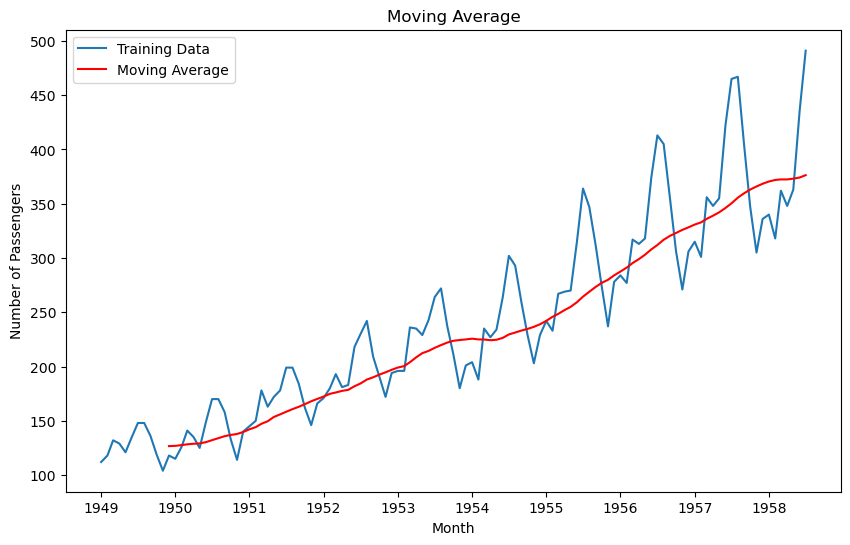

In [46]:
window_size = 12 #example for monthly data
rolling_mean = train_series.rolling(window=window_size).mean()

#Plot
plt.figure(figsize=(10, 6))
plt.plot(train_series, label='Training Data')
plt.plot(rolling_mean, label='Moving Average', color='red')
plt.title('Moving Average')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

### ARIMA

ARIMA models aim to forecast time series data by capturing trends, seasonality, and noise components.


- AR (Autoregressive): Models the relationship between an observation and lagged observations
- I (Integrated): Differencing the series to make it stationary (i.e., moving trends)
- MA (Moving Average): Models the relationshop between an obervation and lagged errors

ORDER (p,d,q):
- p: number of lag terms (AR component)
- d: number of time series the series is differenced to achieve stationarity
- q number of lagged forecast error terms (MA component)

In our example:
- p = 5: up to 5 lag terms
- d = 1: differencing is applied once to make the series stationary.
- q = 0 No moving average terms

NOTES:
p= 5 makes sense for monthly data with strong dependence on recent observations
d = 1 typical for time series data that shows a trend
q = 0 where the moving average component is not included// Not typically average

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


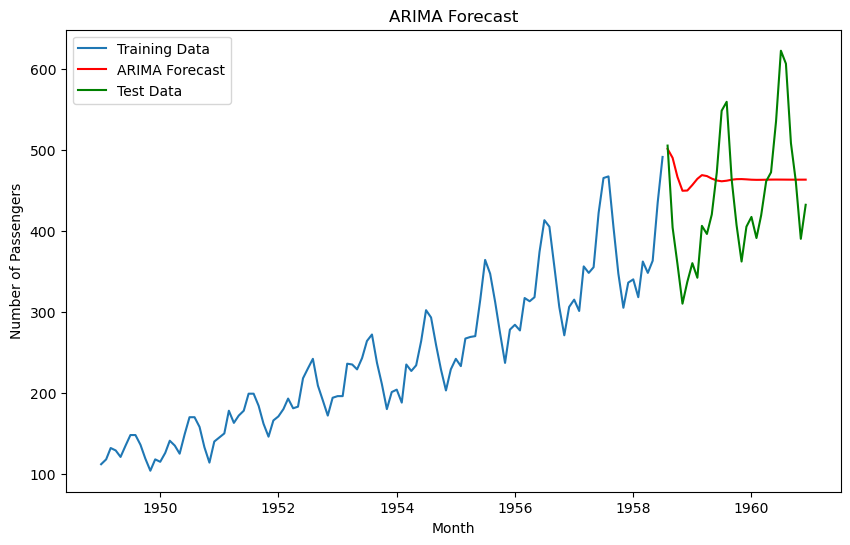

In [44]:
# Fit the ARIMA model
arima_model = ARIMA(train_series, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Make predictions
arima_forecast = arima_fit.forecast(steps=len(test_series))

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test_series, label='Test Data', color='green')
plt.title('ARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## 5. Evaluation:

In [51]:
#packages
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [53]:
# Fit the ARIMA model
arima_model = ARIMA(train_series, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Make predictions
arima_forecast = arima_fit.forecast(steps=len(test_series))

# Ensure the forecast aligns with the test set index
arima_forecast_index = test_series.index
arima_forecast_series = pd.Series(arima_forecast, index=arima_forecast_index)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
# Drop NA values for evaluation
arima_forecast_series = arima_forecast_series.dropna()
y_true = test_series.loc[arima_forecast_series.index]

# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(y_true, arima_forecast_series)
print('Mean Squared Error (ARIMA):', mse_arima)

# Calculate Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(y_true, arima_forecast_series)
print('Mean Absolute Error (ARIMA):', mae_arima)

# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mse_arima)
print('Root Mean Squared Error (ARIMA):', rmse_arima)


Mean Squared Error (ARIMA): 6506.672068796182
Mean Absolute Error (ARIMA): 67.38350058831084
Root Mean Squared Error (ARIMA): 80.6639452840994


## 6. Visualization: 

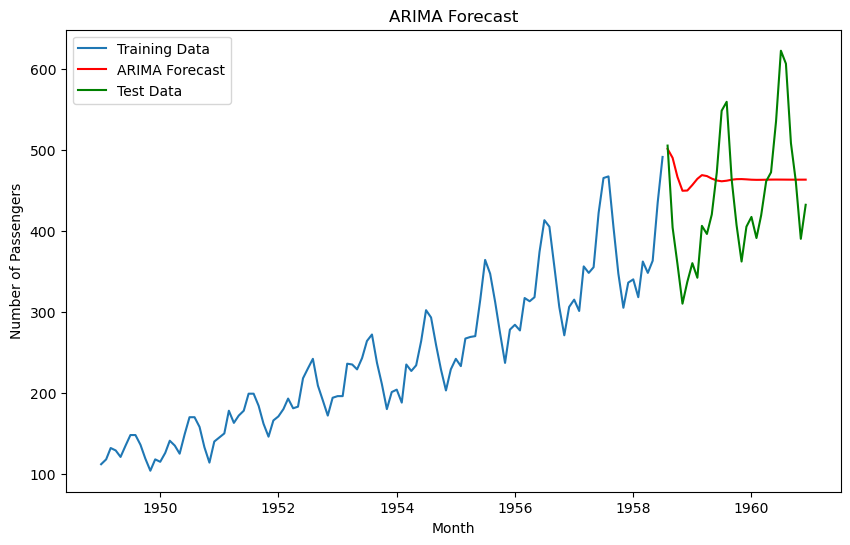

In [58]:
# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series.index, arima_forecast_series, label='ARIMA Forecast', color='red')
plt.plot(test_series, label='Test Data', color='green')
plt.title('ARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


# Seasonal ARIMA

SARIMA:
- similar but SARIMA has m so (P, D, Q, m)
- m  is seasonal frequency (12 for monthly)

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
seasonal_diff = train_series.diff(12).dropna()

In [74]:
#ARIMA Order:
p, d, q = 1, 1, 1  

#SARIMA order
P, D, Q, m = 1, 1, 1, 12 
# Define the model
sarima_model = SARIMAX(train_series, order=(p, d, q), seasonal_order=(P, D, Q, 12))

# Fit the model
sarima_fit = sarima_model.fit(disp=False)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


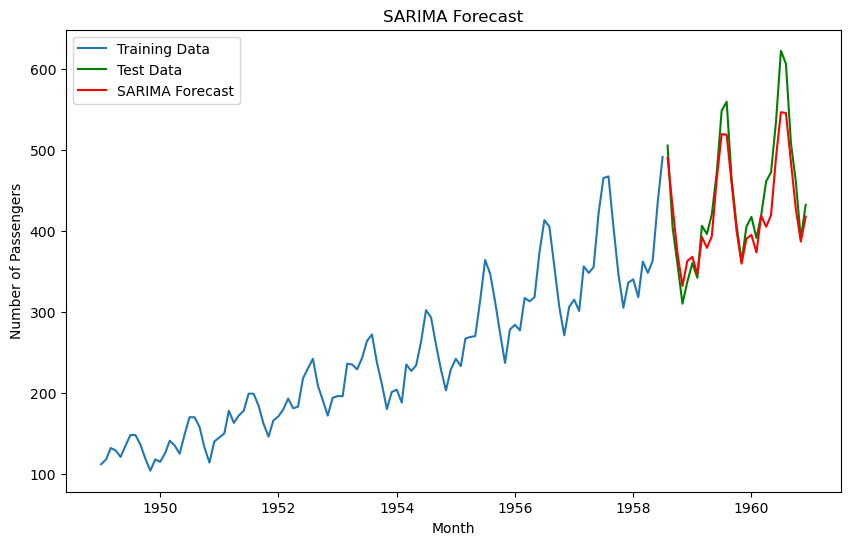

In [76]:
sarima_forecast = sarima_fit.forecast(steps=len(test_series))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series.index, test_series, label='Test Data', color='green')
plt.plot(test_series.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Evaluation Metrics:


In [81]:
sarima_forecast = sarima_fit.forecast(steps=len(test_series))
mse = mean_squared_error(test_series, sarima_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_series, sarima_forecast)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 908.5278432672457
Root Mean Squared Error (RMSE): 30.141795621151132
Mean Absolute Error (MAE): 23.5555197944374


Results No values may still seem high but its a very small data set:
- MSE: Sensitive to large outliers errors Check the peak of travel seeason
- RMSE: off by about 30 passengers mainly at the peaks of travel season
- MAE indicates the average absolute difference between the predicted and actual values. This value suggests that, on average, the model is off by about 24 passengers. Compared to RMSE, MAE is less sensitive to large outliers.